<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Project/Intern_Project/Oasis_Infobyte_DS/3_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_data = pd.read_csv('/content/drive/MyDrive/Internship/Accepted/Oasis_Infobyte_02152024~03152024 /Data Science Internship/DataSets/car data.csv', encoding = 'utf-8')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
import datetime
#Get a current year to find when was the care made
now_year = datetime.datetime.now().year
#It's more important how long has it been after it was made, not the year of manufacture
car_data['Age'] = now_year - car_data['Year']
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Age            301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,10.372093
std,2.891554,5.082812,8.642584,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,6.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,21.000000


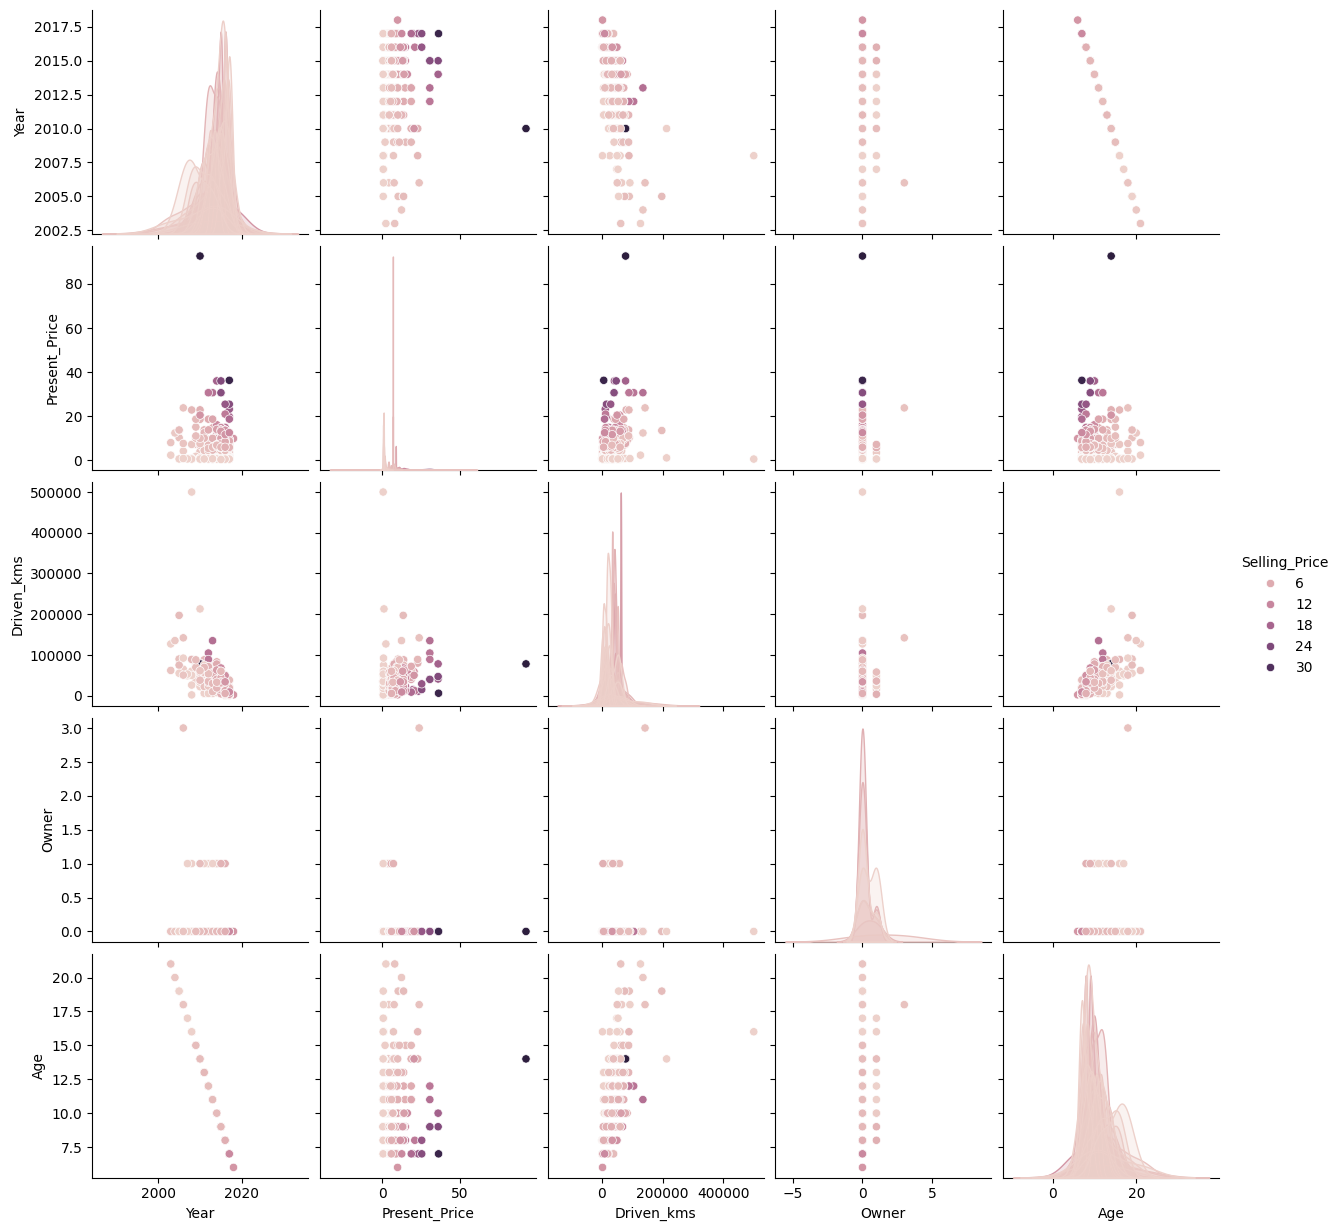

In [ ]:
import seaborn as sns
sns.pairplot(car_data, hue='Selling_Price')

In [ ]:
#It's better to use number than text because numerous ML algorithm require numerical data as input
from sklearn.preprocessing import LabelEncoder
label = ['Fuel_Type', 'Selling_type', 'Transmission']
car_data[label] = car_data[label].apply(LabelEncoder().fit_transform)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,2,0,1,0,10
1,sx4,2013,4.75,9.54,43000,1,0,1,0,11
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,13
4,swift,2014,4.60,6.87,42450,1,0,1,0,10


In [ ]:
#Separate to X_data and y_data, then train
from sklearn.model_selection import train_test_split

X_data = car_data.iloc[:,3:]
y_data = car_data.iloc[:,2]
#Use 30% of data for the test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state=50)

In [ ]:
print('X_train',X_train)
print('X_test',X_test)
print('y_train',y_train)
print('X_test',y_test)

X_train      Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner  \
140           1.20       32000          2             1             1      0   
135           0.74        5000          2             1             1      0   
89            6.76       40000          2             0             1      0   
144           0.99       25000          2             1             1      0   
206           7.13       12479          2             0             1      0   
..             ...         ...        ...           ...           ...    ...   
70            6.76       71000          1             0             1      0   
132           0.95        3500          2             1             1      0   
289          13.60       10980          2             0             1      0   
109           1.47       11000          2             1             1      0   
176           1.05       30000          2             1             1      0   

     Age  
140   11  
135    9 

#XGBoost Regressor

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators = 500, max_depth = 5, random_state = 100)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)
xgb_pred

array([ 2.428295  , 12.854049  ,  2.7752151 ,  3.543026  ,  1.265682  ,
        0.52745354, 22.74611   ,  0.26210326,  5.7342944 ,  9.997329  ,
        3.1018739 ,  0.36670586,  9.61088   ,  0.40461856,  0.38163707,
        0.5495621 ,  7.3617296 ,  0.49974453,  4.6237984 ,  7.2548056 ,
        5.79351   ,  1.8736182 ,  7.1899476 ,  1.9105942 ,  0.2532243 ,
        0.57078576, 19.493011  ,  4.249758  ,  9.189402  ,  6.529096  ,
        1.1280048 ,  6.218456  ,  0.76795906,  2.0118194 ,  5.5321245 ,
        4.979941  ,  3.0209785 ,  4.461004  ,  4.8392167 ,  0.21020554,
        0.3095034 ,  6.636982  ,  4.866963  ,  1.4376397 ,  2.968303  ,
        4.6770563 ,  6.2711377 ,  3.016303  ,  3.2037013 ,  0.47761306,
        1.3816888 ,  3.0059652 ,  3.5143096 ,  2.3024802 ,  7.7503376 ,
        0.7346485 , 11.964928  ,  0.40523037,  3.289437  ,  4.8756037 ,
        3.7127259 ,  3.9357378 ,  1.2660837 ,  9.179156  ,  3.787817  ,
        7.092337  ,  4.2865934 ,  9.579596  ,  0.63576955,  0.30

In [ ]:
#Evaluate the scores with MSE, MAE, R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Lower MSE indicates better performance
mse = mean_squared_error(y_test, xgb_pred)
print("MSE: ", mse, '\n')

#Lower MAE indicates better performance
mae = mean_absolute_error(y_test, xgb_pred)
print("MAE: ", mae, '\n')

#Higher R^2 indicates better model performance
r2 = r2_score(y_test, xgb_pred)
print("R2: ", r2, '\n')

MSE:  1.7573280369904294 

MAE:  0.7393990976535356 

R2:  0.9156875469349612 



#HyperParameter

In [ ]:
#To optimize the model, use GridSearchCV for HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

#Define dictionary containing the hyperparameters to be tuned.
parameters = {
     'learning_rate': [0.001, 0.004, 0.01, 0.05, 0.1],
      #Max depth of trees in the model
     'max_depth': [7, 10, 13, 15],
      #Subsample ratio of training instances
     'subsample': [0.1, 0.5, 1],
      #Number of boosting rounds
     'n_estimators': [120, 150, 180, 220, 500, 1000]
}

#Create instance of XGBoost regressor
model = xgb.XGBRegressor()
#Instance of GridSearchCVV to perform hyper paramter tuning
gs_model = GridSearchCV(model, parameters, n_jobs = -1, scoring='f1', cv = 5)
gs_model.fit(X_train, y_train)
#Print the bestparameters found by GridSearch in dictionary parameters
print(gs_model.best_params_)
#Making predictions on the test data using the best model obtained from hyperparameter tuning
pred = gs_model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, pred)
print("MSE: ", mse, '\n')
mae = mean_absolute_error(y_test, pred)
print("MAE: ", mae, '\n')
r2 = r2_score(y_test, pred)
print("R2: ", r2, '\n')

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 120, 'subsample': 0.1}
MSE:  18.548682302886572 

MAE:  2.919120055816986 

R2:  0.11007798591848483 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [ ]:
#Try XGBoost again with optimized HyperParameter
tune_model = xgb.XGBRegressor(learning_rate = 0.001, max_depth = 7, n_estimators =120, subsample = 0.1, random_state=100)
tune_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [ ]:
#Predict
tune_xgb_pred = tune_model.predict(X_test)
tune_xgb_pred

array([4.678148 , 5.3548007, 4.651811 , 4.743415 , 4.5152674, 4.3473516,
       5.659216 , 4.3503895, 4.887991 , 5.167247 , 4.6799607, 4.3596177,
       5.166615 , 4.3558917, 4.3473516, 4.350818 , 5.4137163, 4.3473516,
       4.8887877, 5.2036376, 4.911407 , 4.734183 , 5.116265 , 4.6375937,
       4.3473516, 4.3473516, 5.613598 , 4.8163524, 5.019201 , 4.86156  ,
       4.4220495, 4.914196 , 4.4961367, 4.655054 , 4.8764887, 5.3122277,
       4.6818657, 4.7729774, 4.7827883, 4.3503895, 4.3473516, 5.012927 ,
       4.7792974, 4.646286 , 4.676835 , 4.802106 , 5.038223 , 4.712305 ,
       4.7075114, 4.3473516, 4.485723 , 4.651811 , 4.75861  , 4.7314563,
       5.1268125, 4.4553885, 5.566658 , 4.3596177, 4.724084 , 4.771336 ,
       4.840742 , 4.78863  , 4.511204 , 5.1259093, 4.775934 , 4.981082 ,
       4.6982193, 5.1367393, 4.3473516, 4.368158 , 4.8502464, 4.6652966,
       4.4540825, 4.653412 , 4.651626 , 4.76105  , 4.8930974, 4.792474 ,
       5.513222 , 4.4361005, 4.3473516, 5.400836 , 

In [ ]:
#Evaluate
mse = mean_squared_error(y_test, tune_xgb_pred)
print("MSE: ", mse, '\n')
mae = mean_absolute_error(y_test, tune_xgb_pred)
print("MAE: ", mae, '\n')
r2 = r2_score(y_test, tune_xgb_pred)
print("R2: ", r2, '\n')

MSE:  18.386953441613798 

MAE:  2.913018311301431 

R2:  0.11783735510756077 



In [ ]:
#Find the feature importance
feature_imp = pd.DataFrame({'features':X_train.columns, 'values':tune_model.feature_importances_})
feature_imp = feature_imp.sort_values(by = 'values', ascending = False)
feature_imp.head()

,features,values
2,Fuel_Type,0.333114
3,Selling_type,0.296055
0,Present_Price,0.229898
4,Transmission,0.057546
6,Age,0.046020


<Axes: xlabel='values', ylabel='features'>

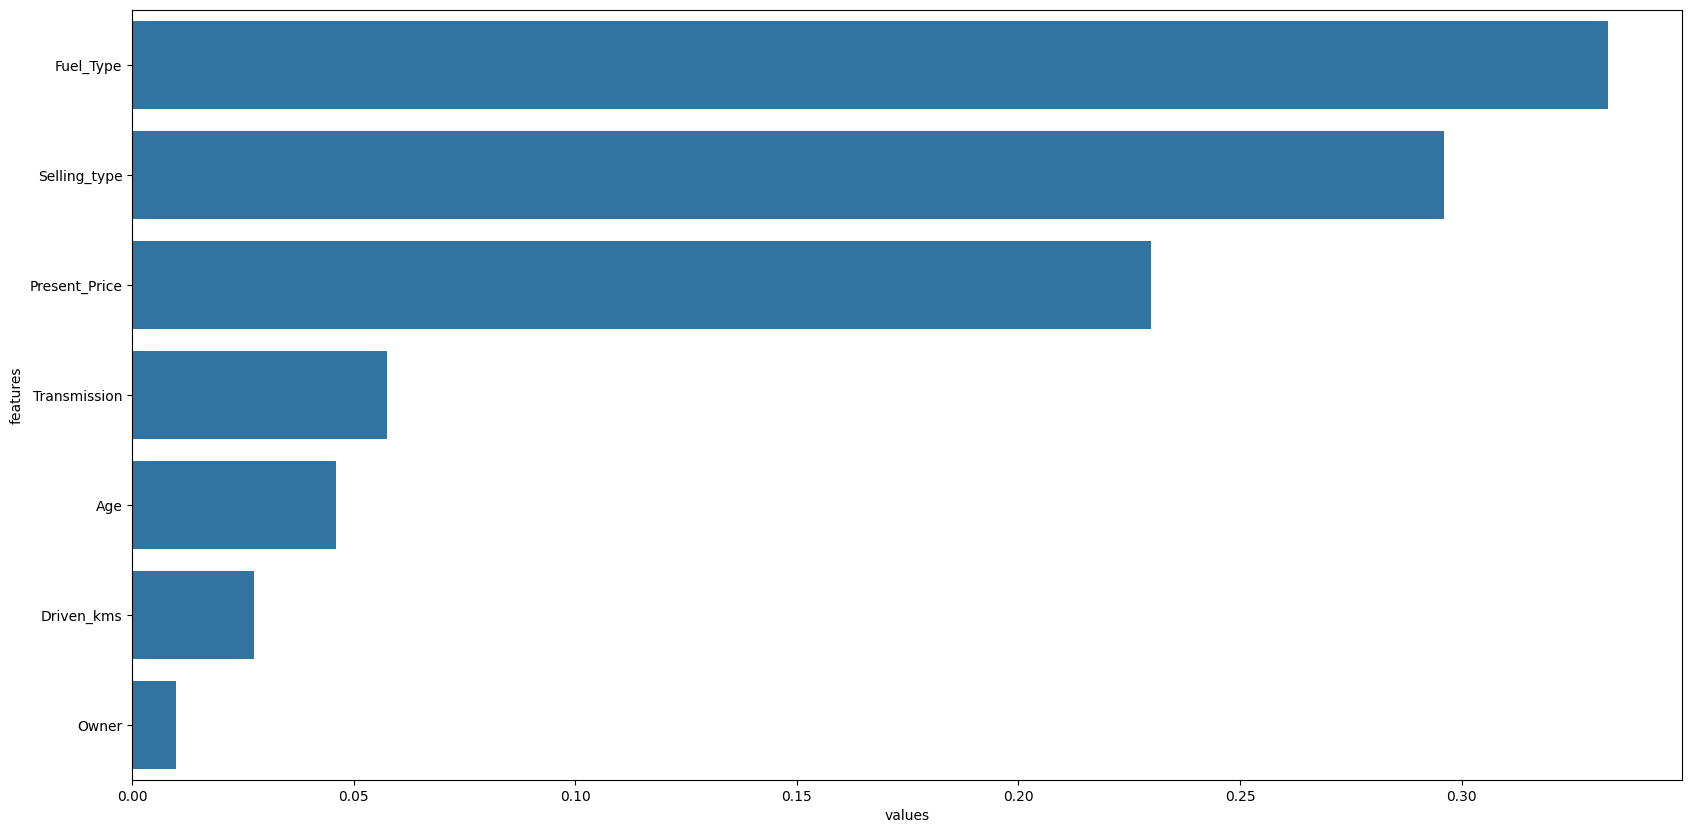

In [ ]:
#Show the feature importance as a graph and see what's more important
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(x='values', y='features',
            data = feature_imp.sort_values(by='values', ascending=False).head(10))